In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Repeated softmaxification

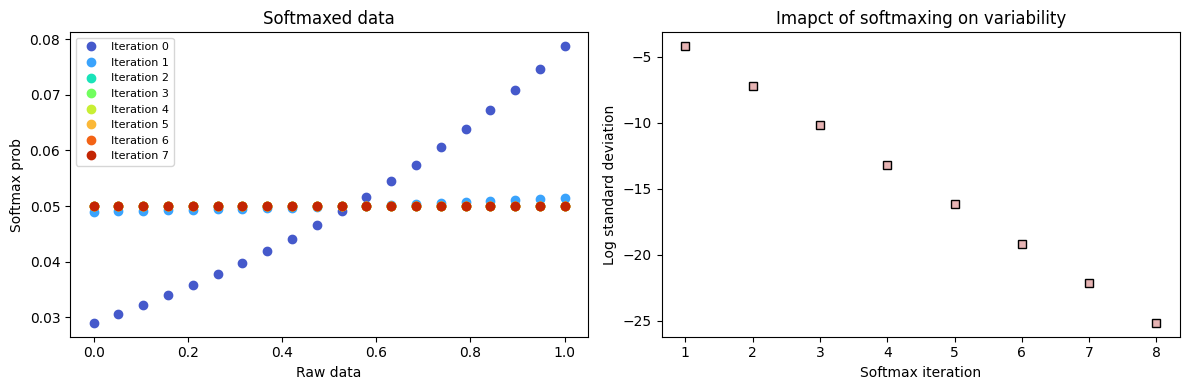

In [3]:
# create some random softmax values
x = np.linspace(0,1,20)
U = np.exp(x) / np.sum(np.exp(x))

num_repeats = 8
Ustd = np.zeros(num_repeats)

# colors for the dots
colors = plt.cm.turbo(np.linspace(.1,.9,num_repeats))

#plot
_,axs = plt.subplots(1,2,figsize=(12,4))
for r in range(num_repeats):
    #plot the pdist
    axs[0].plot(x,U,'o',color=colors[r],markerfacecolor=colors[r],label=f'Iteration {r}')
    
    #get the std
    Ustd[r] = np.std(U)

    #recalculate sofmtaxc
    U = np.exp(U) / np.sum(np.exp(U))

#plot the variance
axs[1].plot(range(1,num_repeats+1), np.log(Ustd),'ks',markerfacecolor=[.9,.7,.7])
axs[1].set(xlabel='Softmax iteration', ylabel='Log standard deviation', title='Imapct of softmaxing on variability')

axs[0].legend(fontsize=8)
axs[0].set(xlabel = 'Raw data',ylabel='Softmax prob', title='Softmaxed data')


plt.tight_layout()
plt.show()

In [ ]:
# we took 20 numbers initially
# and if they all need to sum to one, 
# and if they get squashed down so that all of them are equal, then it should be 0.05

In [5]:
# I expected on repeated iterative softmax, the higher values would pop out and
# lower values get squashed. But that is not the case,WHY???


# Repeated softmax supresses variability
# because of the number of data points and also relatedd to restricted range


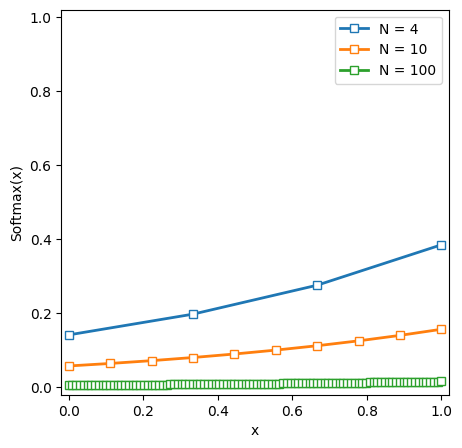

In [8]:
# why repeated softmax supress variablity?

N = [4,10,100]

plt.figure(figsize=(5,5))
for n in N:
    # the data(eg: token logits)
    x = np.linspace(0,1,n)
    #softmax the data
    smx = np.exp(x) / np.exp(x).sum()
    plt.plot(x,smx,'-s',linewidth=2,markerfacecolor='w',label=f'N = {n}')

#make sure axis same
plt.legend()
plt.gca().set(xlim=[-.02,1.02],ylim=[-.02,1.02],xlabel='x',ylabel='Softmax(x)')
plt.show()

In [ ]:
# more data points we have smaller the values will be after softmax


## Impact of range and temperature on softmax distribution

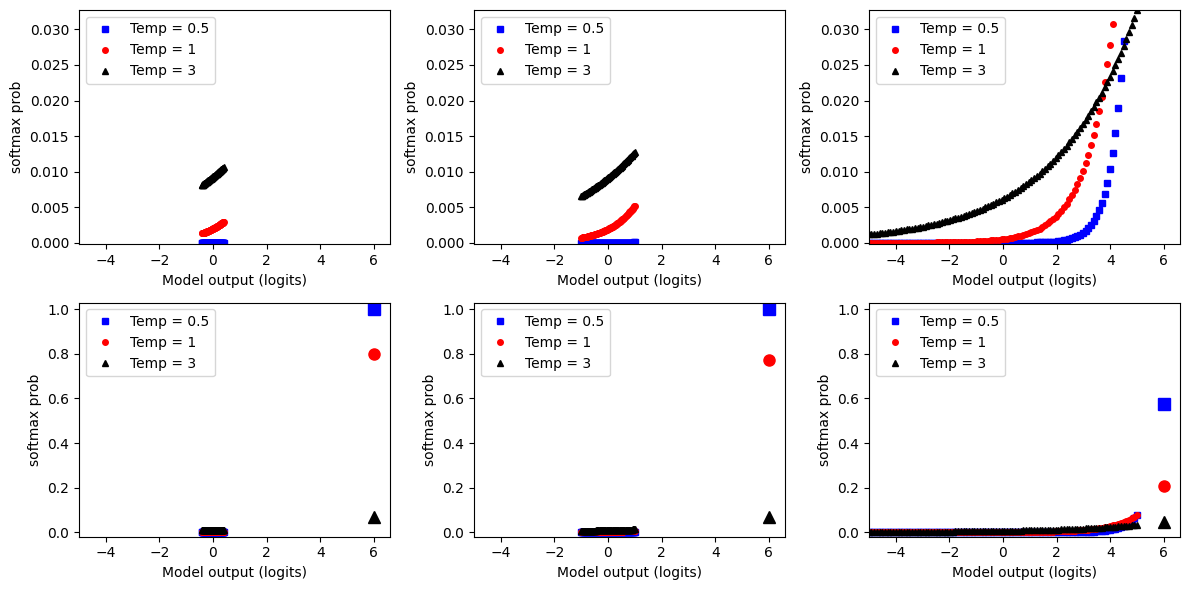

In [17]:
temps = [.5,1,3]
bounds = [.4,1,5] #ranges from -0.4 to +0.4 and so on, on each of the outer for loop

colors = 'brk'
shapes = 'so^'

_,axs = plt.subplots(2,3,figsize=(12,6))

for bndi in range(3):
    logits = torch.linspace(-bounds[bndi],bounds[bndi],100)
    logits = torch.cat((logits,torch.tensor([6])))  ##one large value appended

    for ti in range(3):
        #calcualte softmax with this temp
        T = temps[ti]
        sm = torch.exp(logits/T) / torch.exp(logits/T).sum()

        # plot the same data twice (scaling later)
        for ii in range(2):
            axs[ii,bndi].plot(logits[:-1],sm[:-1],linestyle='none',
                              markerfacecolor=colors[ti],marker=shapes[ti],markeredgecolor=colors[ti],
                              markersize=4,label=f'Temp = {T}')
            #above plot excludes the large value of 6

            
            axs[ii,bndi].plot(logits[-1],sm[-1],markerfacecolor=colors[ti],
                              marker=shapes[ti],markeredgecolor=colors[ti],
                              markersize=8)

#axis settings for top row graphs to highlight the impact on smaller values
for a in axs[1,:]:
    a.set(xlim=[-bounds[-1],6.6],ylim=[-.02,1.03],xlabel='Model output (logits)',ylabel='softmax prob')
    a.legend(loc='upper left')

#axis settings for bottom row graphs to show prob up to 1
for a in axs[0,:]:
    a.set(xlim=[-bounds[-1],6.6],ylim=[-.0002,sm[-2]],xlabel='Model output (logits)',ylabel='softmax prob')
    a.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
#refer to notes

In [19]:
# range of no.s, temp, and no. of data values (eg:vocab size) impacts softmax prob values